# Лабораторная работа №2. Яровенко Максим ИУ5Ц-82Б.

# Загрузка и первичный анализ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# размер набора данных
data = pd.read_csv('laptop.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(130, 11)

In [4]:
# типы колонок
data.dtypes

Unnamed: 0              int64
Brand                  object
Model                  object
Series                 object
Processor              object
Processor_Gen          object
RAM                   float64
Hard_Disk_Capacity     object
OS                     object
Rating                float64
Price                   int64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0             0
Brand                  0
Model                 14
Series                50
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 130


# Обработка пропусков в данных

In [8]:
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((130, 11), (72, 11))

In [9]:
data_new.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940
5,5,ASUS,Ryzen,3,3250U,3rd,8.0,256 GB SSD,Windows 10 Home,4.3,35940
6,6,DELL,Inspiron,Athlon,3050U,-,4.0,256 GB SSD,Windows 11 Home,4.2,33940
8,8,Lenovo,IdeaPad,3,i3,10th,8.0,1 TB HDD,Windows 10 Home,4.1,37440


# Преобразование категориальных признаков в числовые

In [10]:
# one-hot кодирование (то есть кодирование бинарными значениями)
pd.get_dummies(data_new).head()

,Unnamed: 0,RAM,Rating,Price,Brand_ASUS,Brand_DELL,Brand_HP,Brand_Lenovo,Brand_MICROSOFT,Brand_MSI,...,Hard_Disk_Capacity_32 GB EMMC Storage,Hard_Disk_Capacity_512 GB SSD,Hard_Disk_Capacity_64 GB EMMC Storage,OS_128 GB SSD,OS_256 GB SSD,OS_Chrome OS,OS_DOS,OS_Windows 10,OS_Windows 10 Home,OS_Windows 11 Home
2,2,8.0,4.3,37940,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,4,8.0,4.5,57940,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,5,8.0,4.3,35940,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,6,4.0,4.2,33940,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,8,8.0,4.1,37440,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
brand_enc = data_new.T
brand_enc = pd.DataFrame({'c1': brand_enc.T["Brand"]})
brand_enc

,c1
2,ASUS
4,ASUS
5,ASUS
6,DELL
8,Lenovo
...,...
115,Lenovo
116,Lenovo
118,ASUS
128,ASUS


In [13]:
brand_enc['c1'].unique()

array(['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'realme',
       'MICROSOFT'], dtype=object)

In [14]:
le = LabelEncoder()
brand_enc_le = le.fit_transform(brand_enc['c1'])

In [15]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['ASUS', 'DELL', 'HP', 'Lenovo', 'MICROSOFT', 'MSI', 'acer',
       'realme'], dtype=object)

In [16]:
brand_enc_le

array([0, 0, 0, 1, 3, 3, 3, 1, 2, 3, 6, 0, 3, 0, 0, 3, 0, 2, 0, 3, 0, 3,
       3, 0, 2, 1, 1, 5, 0, 0, 3, 0, 6, 3, 0, 2, 2, 3, 0, 0, 7, 5, 0, 3,
       3, 0, 3, 3, 2, 1, 0, 2, 0, 3, 0, 2, 3, 4, 0, 0, 6, 2, 3, 0, 0, 3,
       3, 3, 3, 0, 0, 3])

In [17]:
np.unique(brand_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [18]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['ASUS', 'DELL', 'HP', 'Lenovo'], dtype=object)

# Масштабирование данных

## MinMax масштабирование

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

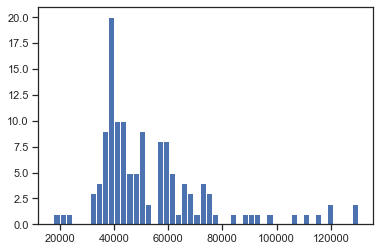

In [21]:
plt.hist(data['Price'], 50)
plt.show()

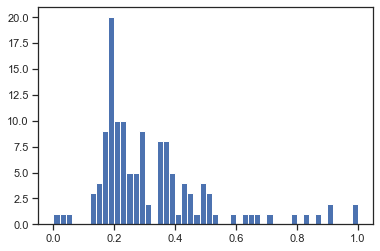

In [22]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [23]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price']])

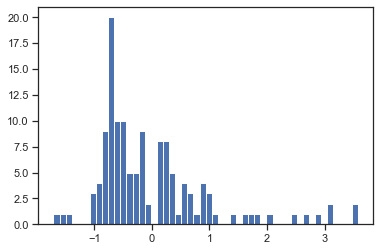

In [24]:
plt.hist(sc2_data, 50)
plt.show()